In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# from tqdm.notebook import tqdm
from tqdm import tqdm
import pandas as pd
import pyarrow.parquet as pq
from datetime import datetime, timedelta
from shapely.geometry import Point
from shapely.strtree import STRtree
import utm
import glob
import os
import time
import pandas as pd
import pyarrow.parquet as pq
import geopandas as gpd
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import geopandas as gpd
import multiprocessing
import os
import sys
import numpy
from pyproj import Transformer
import argparse
from itertools import chain
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pyproj
import h3pandas
from sklearn.metrics import confusion_matrix

# gh3

In [ ]:
import gedih3 as gh3
import gedidriver as gdr

In [ ]:
from dask.distributed import Client

In [ ]:
my_client = Client(n_workers=10, threads_per_worker=1)

In [ ]:
my_client.shutdown()

In [ ]:
sn = gdf.gedi_sn.iloc[0]
sn_info = gdr.GEDIShot(sn, file_query=True)
sn_info.soc_path
df = gdr.get_gedi_ddf(['/gpfs/data1/vclgp/data/iss_gedi/soc/2019/100/GEDI01_B_2019100004641_O01835_03_T00235_02_005_02_V002.h5'], ['shot_number'], ('l2a'), (['sensitivity','quality_flag', 'beam', 'delta_time']))
df.query("quality_flag == 1").head()

In [ ]:
gdf = gpd.GeoDataFrame(GEDI_df_final, geometry=gpd.points_from_xy(GEDI_df_final.gedi_lon, GEDI_df_final.gedi_lat, crs=4326))
# h3df = gh3.h3_aoi(gdf)
# gh3.load_gedi()

# read xovers

In [2]:
xovers = pd.read_parquet('/gpfs/data1/vclgp/aghdamim/LVIS/crossover/Michelle/GEDI_LVIS_xovers_closest_oct23.parquet')
print(len(xovers))
xovers['gedi_sn'] = xovers['gedi_sn'].astype('uint64')
xovers['lvis_shot_id'] = xovers['lvis_lfid'].astype(str) + xovers['lvis_sn'].astype(str)
xovers['gedi_lon'] = (xovers['gedi_lon'] + 180) % 360 - 180
xovers['lvis_lon'] = (xovers['lvis_lon'] + 180) % 360 - 180
xovers = gpd.GeoDataFrame(xovers, geometry=gpd.points_from_xy(xovers['gedi_lon'], xovers['gedi_lat']), crs="EPSG:4326")
xovers = xovers.h3.geo_to_h3(12).h3.h3_to_parent(3)
xovers

675865


,gedi_sn,gedi_lon,gedi_lat,u1,lvis_lfid,lvis_sn,lvis_lon,lvis_lat,u2,lvis_shot_id,geometry,h3_03
h3_12,,,,,,,,,,,,
8c26c10b662e3ff,18350600300692465,-97.901740,35.205134,330.245,1658624219,14617110,-97.901829,35.205158,330.794,165862421914617110,POINT (-97.90174 35.20513),8326c1fffffffff
8c26c10b66745ff,18350600300692467,-97.900820,35.204431,327.624,1658624219,14617643,-97.900768,35.204394,327.383,165862421914617643,POINT (-97.90082 35.20443),8326c1fffffffff
8c26c10b66755ff,18350600300692468,-97.900359,35.204079,328.336,1658624219,14617899,-97.900340,35.204033,328.207,165862421914617899,POINT (-97.90036 35.20408),8326c1fffffffff
8c26c10b6644bff,18350600300692470,-97.899439,35.203377,329.040,1658624219,14618293,-97.899342,35.203409,328.910,165862421914618293,POINT (-97.89944 35.20338),8326c1fffffffff
8c26c10b292b7ff,18350600300692479,-97.895297,35.200217,331.916,1658624219,14620053,-97.895225,35.200276,331.534,165862421914620053,POINT (-97.89530 35.20022),8326c1fffffffff
...,...,...,...,...,...,...,...,...,...,...,...,...
8c82a112061b1ff,241121100100058077,13.319690,-1.420531,344.086,1657441070,4613048,13.319708,-1.420557,344.040,16574410704613048,POINT (13.31969 -1.42053),8382a1fffffffff
8c82a11206f65ff,241121100100058079,13.320283,-1.419694,326.747,1657441070,4613485,13.320257,-1.419662,327.010,16574410704613485,POINT (13.32028 -1.41969),8382a1fffffffff
8c82a1123d349ff,241121100100058084,13.321767,-1.417602,286.595,1657441070,4614803,13.321783,-1.417605,287.250,16574410704614803,POINT (13.32177 -1.41760),8382a1fffffffff


In [3]:
print(len(xovers[xovers['lvis_shot_id'].duplicated(keep=False)]))
print(len(xovers[xovers['gedi_sn'].duplicated(keep=False)]))

21746
0


In [4]:
def parallel_run(h3):
    temp_df = pd.read_parquet(f'/gpfs/data1/vclgp/data/iss_gedi/h3/ancillary/nasa_dem/{h3}.parquet')
    return temp_df[temp_df['shot_number'].isin(xovers['gedi_sn'].values)]

h3_list = xovers.h3_03.unique()
nasa_dem = []
n_cpus = 20
pool = multiprocessing.Pool(n_cpus)
for temp_df in tqdm(pool.imap_unordered(parallel_run, h3_list), total=len(h3_list), position=0):
    nasa_dem.append(temp_df)
pool.close()
nasa_dem = pd.concat(nasa_dem, ignore_index=True)

100%|███████████████████████████████████████████████| 369/369 [01:02<00:00,  5.89it/s]


In [5]:
nasa_dem

,shot_number,relative_pixel_distance,elevation,slope,aspect,water_mask,elevation_mean_3x3,slope_mean_3x3,water_mask_sum_3x3
0,56620500200239664,0.221278,-2.0,3.193521,270.000000,0.0,-0.777778,2.983875,0.0
1,56620500200239672,0.355012,0.0,2.976873,20.955994,0.0,-0.888889,2.081594,0.0
2,56620500200239673,0.190815,-2.0,2.823197,228.965134,0.0,-1.555556,2.229797,0.0
3,56620500200239674,0.263345,-1.0,0.000000,-0.000000,0.0,-1.000000,0.830352,0.0
4,56620800200239405,0.040417,0.0,1.065526,90.000000,0.0,0.111111,0.751957,0.0
...,...,...,...,...,...,...,...,...,...
674140,70090100300183427,0.430194,2021.0,10.194938,8.049187,0.0,2019.555542,12.012489,0.0
674141,70090200300188846,0.222025,2150.0,30.162899,265.206512,0.0,2143.444336,32.906303,0.0
674142,179430500300360159,0.343827,2145.0,37.236805,63.431866,0.0,2145.111084,39.002750,0.0
674143,99360300300165477,0.218954,545.0,0.000000,-0.000000,0.0,545.000000,1.197623,0.0


# read gedi/lvis

In [6]:
LVIS = pd.read_parquet('/gpfs/data1/vclgp/aghdamim/LVIS/crossover/Michelle/LVIS.parquet')
print(len(LVIS))
LVIS = pd.merge(LVIS, xovers[['gedi_sn', 'lvis_shot_id']], on='lvis_shot_id', how='inner')
print(len(LVIS))

590506
600636


In [7]:
GEDI_L2A = pd.read_parquet('/gpfs/data1/vclgp/aghdamim/LVIS/crossover/Michelle/GEDI_L2A.parquet')
print(len(GEDI_L2A))
GEDI_L1B = pd.read_parquet('/gpfs/data1/vclgp/aghdamim/LVIS/crossover/Michelle/GEDI_L1B.parquet')
print(len(GEDI_L1B))

674088
620995


In [8]:
common_sn = np.intersect1d(LVIS['gedi_sn'].values, GEDI_L2A['shot_number'].values)
common_sn = np.intersect1d(common_sn, GEDI_L1B['shot_number'].values)
common_sn = np.intersect1d(common_sn, nasa_dem['shot_number'].values)

GEDI_L2A_df = GEDI_L2A.copy()
GEDI_L2A_df = GEDI_L2A_df[GEDI_L2A_df['shot_number'].isin(common_sn)]
GEDI_L2A_df = GEDI_L2A_df.sort_values(by='shot_number')
GEDI_L2A_df = GEDI_L2A_df.reset_index(drop=True)

GEDI_L1B_df = GEDI_L1B.copy()
GEDI_L1B_df = GEDI_L1B_df[GEDI_L1B_df['shot_number'].isin(common_sn)]
GEDI_L1B_df = GEDI_L1B_df.sort_values(by='shot_number')
GEDI_L1B_df = GEDI_L1B_df.reset_index(drop=True)

LVIS_df = LVIS.copy()
LVIS_df = LVIS_df[LVIS_df['gedi_sn'].isin(common_sn)]
LVIS_df = LVIS_df.sort_values(by='gedi_sn')
LVIS_df = LVIS_df.reset_index(drop=True)

NASA_DEM_df = nasa_dem.copy()
NASA_DEM_df = NASA_DEM_df[NASA_DEM_df['shot_number'].isin(common_sn)]
NASA_DEM_df = NASA_DEM_df.sort_values(by='shot_number')
NASA_DEM_df = NASA_DEM_df.reset_index(drop=True)

In [9]:
print(np.array_equal(GEDI_L2A_df['shot_number'].values, GEDI_L1B_df['shot_number'].values))
print(np.array_equal(GEDI_L2A_df['shot_number'].values, LVIS_df['gedi_sn'].values))
print(np.array_equal(LVIS_df['gedi_sn'].values, NASA_DEM_df['shot_number'].values))
print(len(LVIS_df), len(GEDI_L1B_df), len(GEDI_L2A_df), len(NASA_DEM_df))

True
True
True
549082 549082 549082 549082


In [10]:
def select_GEDI_L2A_alg(GEDI_L2A_df, algorithm='1'):
    alg_cols = [col for col in GEDI_L2A_df.columns if any(suffix in col for suffix in ['_a1', '_a2', '_a5', '_a10'])]
    alg_cols = pd.Series(alg_cols).str.replace(r'_a[125]0?', '_a{}', regex=True).unique()
    same_cols = [col for col in GEDI_L2A_df.columns if not any(suffix in col for suffix in ['_a1', '_a2', '_a5', '_a10'])]
    extra_cols = []# ['rx_processing_a2/rx_algrunflag', 'rx_processing_a2/zcross', 'rx_processing_a2/toploc', 'geolocation/sensitivity_a1']
    
    GEDI_L2A_df2 = GEDI_L2A_df[same_cols+extra_cols].copy()
    for alg_col in alg_cols:
        if algorithm=='selected':
            column_list = []
            for i, alg in enumerate(GEDI_L2A_df['selected_algorithm'].values):
                column_list.append(GEDI_L2A_df[alg_col.format(alg)].values[i])
        else:
            column_list = GEDI_L2A_df[alg_col.format(algorithm)].values
        GEDI_L2A_df2[alg_col.replace('_a{}', '')] = column_list
    return GEDI_L2A_df2

In [282]:
GEDI_L2A_df_alg = select_GEDI_L2A_alg(GEDI_L2A_df, algorithm='2')
GEDI_L2A_df_alg.columns

Index(['beam', 'channel', 'degrade_flag', 'delta_time',
       'digital_elevation_model', 'digital_elevation_model_srtm',
       'elevation_bias_flag', 'geolocation/stale_return_flag',
       'land_cover_data/landsat_treecover',
       'land_cover_data/landsat_water_persistence',
       'land_cover_data/leaf_off_flag', 'land_cover_data/pft_class',
       'land_cover_data/region_class', 'land_cover_data/urban_proportion',
       'rx_assess/mean', 'rx_assess/mean_64kadjusted',
       'rx_assess/quality_flag', 'rx_assess/rx_assess_flag',
       'rx_assess/rx_energy', 'rx_assess/rx_maxamp', 'rx_assess/sd_corrected',
       'selected_algorithm', 'selected_mode', 'shot_number', 'solar_azimuth',
       'solar_elevation', 'surface_flag', 'geolocation/elev_highestreturn',
       'geolocation/elev_lowestmode', 'geolocation/elev_lowestreturn',
       'geolocation/lat_highestreturn', 'geolocation/lat_lowestmode',
       'geolocation/lat_lowestreturn', 'geolocation/lon_highestreturn',
       'geolo

In [283]:
print(np.array_equal(GEDI_L2A_df['shot_number'].values, GEDI_L2A_df_alg['shot_number'].values))

True


# residuals

In [284]:
rh98_residual = GEDI_L2A_df_alg['geolocation/rh_98'].values/100 -  LVIS_df['RH98'].values
ctop_residuals = GEDI_L2A_df_alg['geolocation/elev_highestreturn'].values - LVIS_df['ZT'].values
ground_residuals = GEDI_L2A_df_alg['geolocation/elev_lowestmode'].values - LVIS_df['ZG'].values

549082


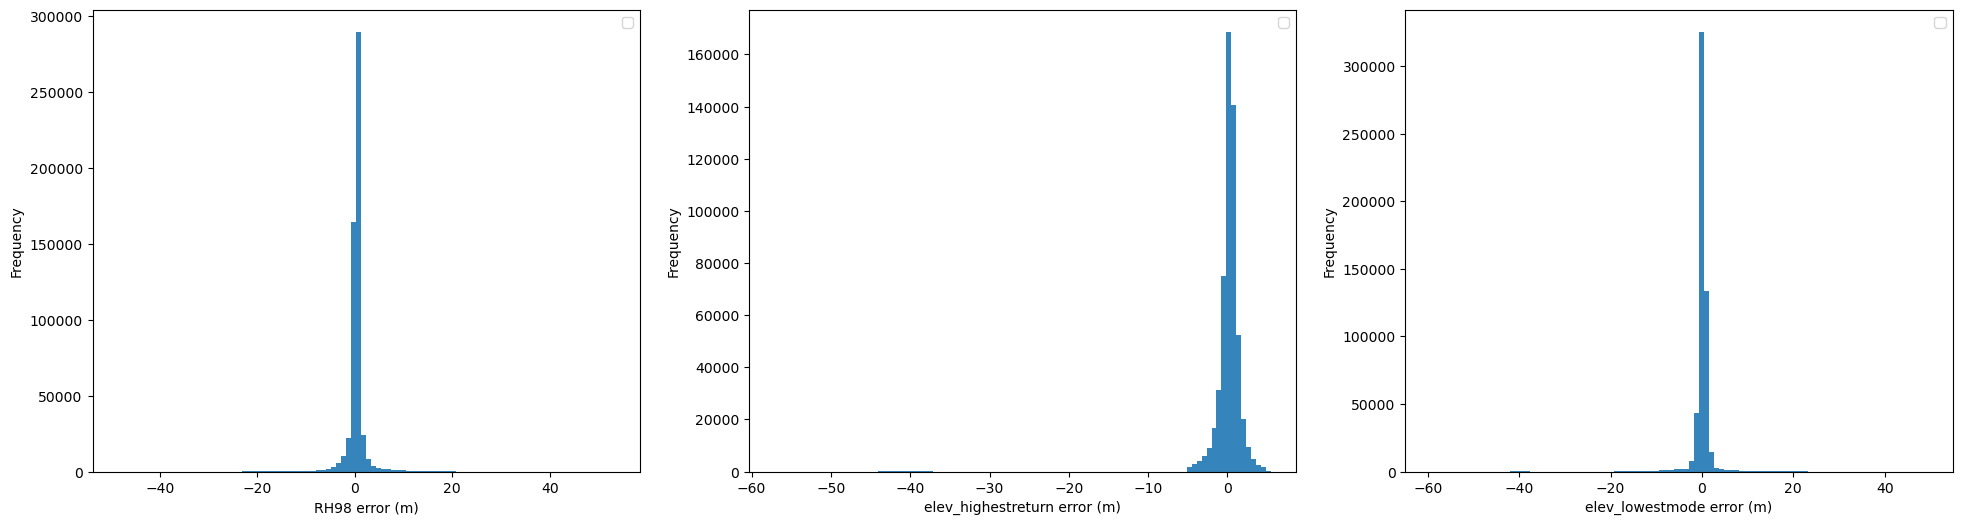

In [285]:
filtering_mask = np.abs(ground_residuals)<20000
print(np.sum(filtering_mask))

rh98_mean = np.mean(rh98_residual[filtering_mask])
rh98_std = np.std(rh98_residual[filtering_mask])

ctop_mean = np.mean(ctop_residuals[filtering_mask])
ctop_std = np.std(ctop_residuals[filtering_mask])

ground_mean = np.mean(ground_residuals[filtering_mask])
ground_std = np.std(ground_residuals[filtering_mask])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
axs[0].hist(rh98_residual[filtering_mask], bins=100, alpha=0.9, histtype="bar")
axs[0].set_xlabel('RH98 error (m)')
axs[0].set_ylabel('Frequency')
# axs[0].set_yscale("log")
# axs[0].axvline(rh98_mean+rh98_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[0].axvline(rh98_mean-rh98_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[0].axvline(rh98_mean+2*rh98_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[0].axvline(rh98_mean-2*rh98_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[0].axvline(rh98_mean+3*rh98_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
# axs[0].axvline(rh98_mean-3*rh98_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles[::2], labels[::2], loc='upper right')

axs[1].hist(ctop_residuals[filtering_mask], bins=100, alpha=0.9, histtype="bar")
axs[1].set_xlabel('elev_highestreturn error (m)')
axs[1].set_ylabel('Frequency')
# axs[1].set_yscale("log")
# axs[1].axvline(ctop_mean)
# axs[1].axvline(ctop_mean+ctop_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[1].axvline(ctop_mean-ctop_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[1].axvline(ctop_mean+2*ctop_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[1].axvline(ctop_mean-2*ctop_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[1].axvline(ctop_mean+3*ctop_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
# axs[1].axvline(ctop_mean-3*ctop_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles[::2], labels[::2], loc='upper right')

axs[2].hist(ground_residuals[filtering_mask], bins=100, alpha=0.9, histtype="bar")
axs[2].set_xlabel('elev_lowestmode error (m)')
axs[2].set_ylabel('Frequency')
# axs[2].set_yscale("log")
# axs[2].axvline(ground_mean)
# axs[2].axvline(ground_mean+ground_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[2].axvline(ground_mean-ground_std,  color = 'r', linestyle='--', label='1 stddev', linewidth=0.9, alpha=0.8)
# axs[2].axvline(ground_mean+2*ground_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[2].axvline(ground_mean-2*ground_std,  color = 'k', linestyle='-.', label='2 stddev', linewidth=0.9, alpha=0.8)
# axs[2].axvline(ground_mean+3*ground_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
# axs[2].axvline(ground_mean-3*ground_std,  color = 'g', linestyle=':', label='3 stddev', linewidth=0.9, alpha=0.9)
handles, labels = axs[2].get_legend_handles_labels()
axs[2].legend(handles[::2], labels[::2], loc='upper right')

# plt.savefig('histogramsd.png', dpi=300)
plt.show()

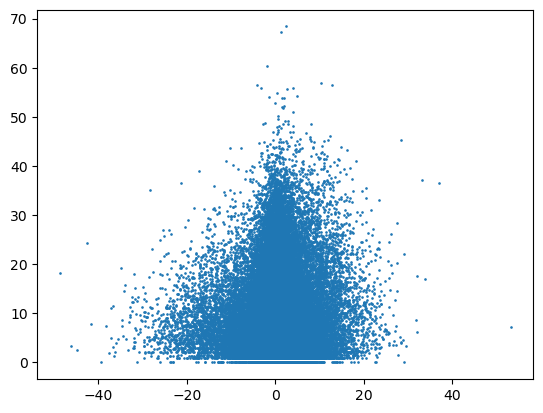

In [286]:
plt.scatter(rh98_residual, NASA_DEM_df['slope'], s=0.8)

# distances

In [287]:
transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:6933', always_xy=True)
x_lvis,y_lvis = transformer.transform(LVIS_df['GLON'].values, LVIS_df['GLAT'].values)
x_gedi,y_gedi = transformer.transform(GEDI_L2A_df_alg['geolocation/lon_lowestmode'].values, GEDI_L2A_df_alg['geolocation/lat_lowestmode'].values)
distances_1 = np.sqrt((x_lvis-x_gedi)**2 + (y_lvis-y_gedi)**2)
print(len(distances_1))

549082


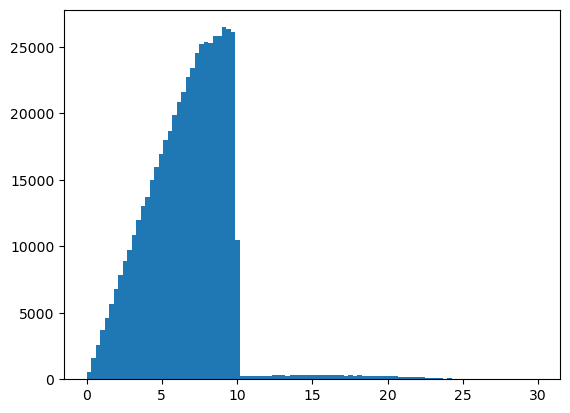

In [288]:
plt.plot()
plt.hist(distances_1[distances_1<30], bins=100)
# plt.hist(distances, bins=100)
plt.show()

In [289]:
transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:6933', always_xy=True)
x_lvis,y_lvis = transformer.transform(xovers['lvis_lon'].values, xovers['lvis_lat'].values)
x_gedi,y_gedi = transformer.transform(xovers['gedi_lon'].values, xovers['gedi_lat'].values)
distances_2 = np.sqrt((x_lvis-x_gedi)**2 + (y_lvis-y_gedi)**2)
print(len(distances_2))

675865


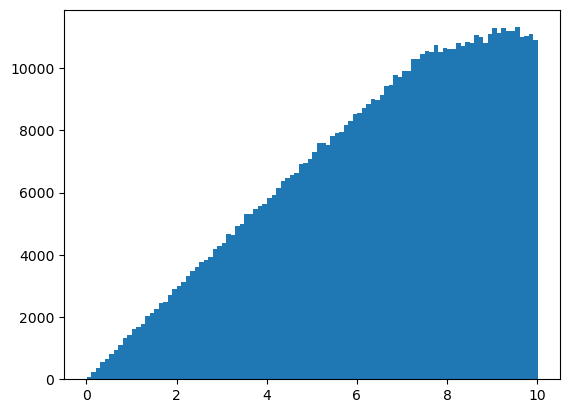

In [290]:
plt.plot()
# plt.hist(distances[distances<30], bins=100)
plt.hist(distances_2, bins=100)
plt.show()

In [226]:
def query_gedi_by_index(gedi_ind, GEDI_L2A_df_alg, GEDI_L1B_df):
    shot_number = GEDI_L2A_df_alg['shot_number'].iloc[gedi_ind]
    elev_lowestmode = GEDI_L2A_df_alg['geolocation/elev_lowestmode'].iloc[gedi_ind]
    elev_highestreturn = GEDI_L2A_df_alg['geolocation/elev_highestreturn'].iloc[gedi_ind]
    wfCount = GEDI_L1B_df['rx_sample_count'].iloc[gedi_ind]
    waveform = GEDI_L1B_df['rxwaveform'].iloc[gedi_ind][:wfCount]
    elev_bin0 = GEDI_L1B_df['geolocation/elevation_bin0'].iloc[gedi_ind]
    elev_lastbin = GEDI_L1B_df['geolocation/elevation_lastbin'].iloc[gedi_ind] 
    zstretch = np.add(elev_lastbin, np.multiply(range(wfCount,0,-1), ((elev_bin0-elev_lastbin) / int(wfCount-1))))
    return [shot_number, wfCount, elev_lowestmode, elev_highestreturn, elev_bin0, elev_lastbin, waveform, zstretch]
    

def query_lvis_by_index(lvis_ind, LVIS_df):
    SN = LVIS_df['SHOTNUMBER'].iloc[lvis_ind]
    LFID = LVIS_df['LFID'].iloc[lvis_ind]
    ZG = LVIS_df['ZG'].iloc[lvis_ind]
    ZT = LVIS_df['ZT'].iloc[lvis_ind]
    waveform = LVIS_df['RXWAVE'].iloc[lvis_ind]
    wfCount = len(waveform)
    Z0 = LVIS_df['Z0'].iloc[lvis_ind]
    Z1023 = LVIS_df['Z1023'].iloc[lvis_ind]
    zstretch = np.add(Z1023, np.multiply(range(wfCount, 0, -1),((Z0 - Z1023)/int(wfCount - 1))))
    return [SN, LFID, ZG, ZT, Z0, Z1023, waveform, zstretch]

# plot

In [227]:
def plot_wf(ind, shap_inds=[]):
    [shot_number, wfCount, elev_lowestmode, elev_highestreturn, elev_bin0, elev_lastbin, gedi_wf, gedi_zstretch] = query_gedi_by_index(ind, GEDI_L2A_df_alg, GEDI_L1B_df)
    [SN, LFID, ZG, ZT, Z0, Z1023, lvis_wf, lvis_zstretch] = query_lvis_by_index(ind, LVIS_df)
    print('gedi sn: ', shot_number)
    print('lvis sn: ', SN)
    print('lvis lfid: ', LFID)
    print('dist1: ', distances_1[ind])
    print('dist2: ', distances_2[ind])

    fig = plt.figure(figsize=(8, 10))
    alpha_value = 0.9
    # compare
    figplot = fig.add_subplot(111) 
    plt.ylabel('elevation(m)')
    plt.xlabel('amplitude')
    
    figplot.plot((lvis_wf-np.min(lvis_wf))/(np.max(lvis_wf)-np.min(lvis_wf)), lvis_zstretch, label='LVIS')
    plt.axhline(y = ZG, color = 'b', label='LVIS ground', linewidth=0.9, alpha=alpha_value)
    plt.axhline(y = ZT, color = 'b', linestyle='--', label='LVIS highest return', linewidth=0.9, alpha=alpha_value)

    gedi_wf = 1+((gedi_wf-np.min(gedi_wf))/(np.max(gedi_wf)-np.min(gedi_wf)))
    figplot.plot(gedi_wf, gedi_zstretch, 'grey', label='GEDI')
    plt.axhline(y = elev_lowestmode, color = 'k', label='GEDI ground', linewidth=0.9, alpha=alpha_value)
    plt.axhline(y = elev_highestreturn, color = 'k', linestyle='--', label='GEDI highest return', linewidth=0.9, alpha=alpha_value)
    plt.legend()
    plt.title('ctop_res(m)={:.2f},   grd_res(m)={:.2f},   rh98_res(m)={:.2f}'.format(ctop_residuals[ind], ground_residuals[ind], rh98_residual[ind]))
    # plt.savefig('plots/wf6.png', dpi=300, bbox_inches='tight')

    if len(shap_inds)>0: 
        plt.plot(gedi_wf[shap_inds], gedi_zstretch[shap_inds], 'ro', markersize=2.5)
    plt.show()

ind:  452754
gedi sn:  18350600300692909
lvis sn:  14721108
lvis lfid:  1658624221
dist1:  3.788272949758614
dist2:  3.758269451682054


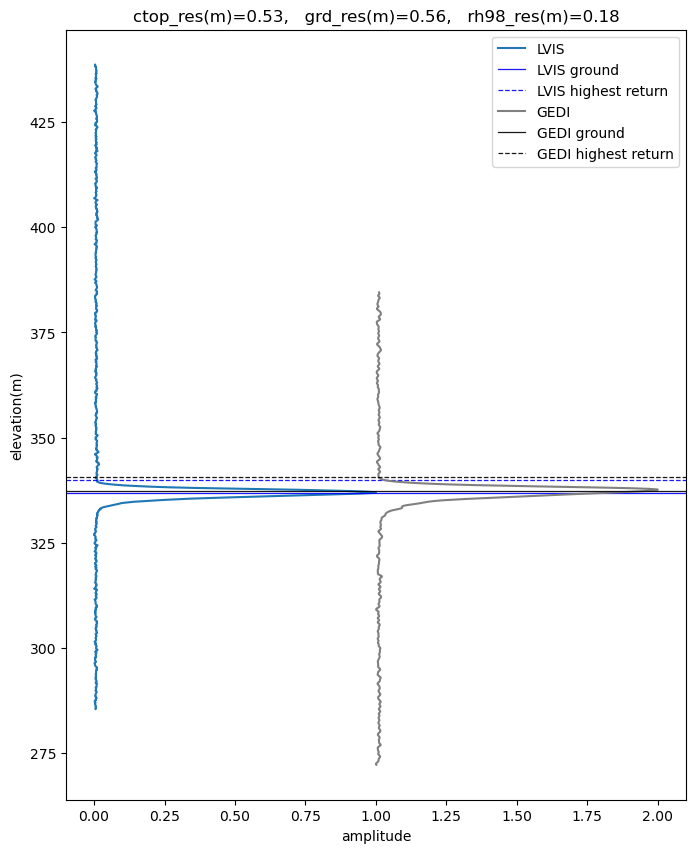

In [292]:
args = np.argsort(np.abs(rh98_residual))
args = np.argsort(np.abs(ground_residuals))
ind = args[-34]
print('ind: ', ind)
plot_wf(123)

In [293]:
rh98_std = np.std(GEDI_L2A_df_alg['geolocation/rh_98'])
mean = np.mean(GEDI_L2A_df_alg['geolocation/rh_98'])
print('std(m): ', rh98_std)
print('mean(m): ', mean)
print('number of shots: ', len(GEDI_L2A_df_alg))
print('number of outliers: ', np.sum(GEDI_L2A_df_alg['geolocation/rh_98']>mean+3*rh98_std))
print('number of outliers: ', np.sum(GEDI_L2A_df_alg['geolocation/rh_98']<mean-3*rh98_std))

std(m):  667.1917411130763
mean(m):  512.0118415828601
number of shots:  549082
number of outliers:  16744
number of outliers:  0


In [119]:
def plot_scatter(GEDI_L2A_df_alg, LVIS_df, bins=200, limit=100, vmax=10):
    fig, ax = plt.subplots(figsize=(8, 8))
    x_data = LVIS_df['RH98']
    y_data = GEDI_L2A_df_alg['geolocation/rh_98']/100
    cs = plt.hist2d(x_data, y_data, bins=bins, cmin=1, vmax=vmax, cmap='jet', range=[(0,100),(0,100)])
    # b, a = np.polyfit(x_data, xovers_2016['rh_98'], deg=1)
    # ax.axline((0, a), slope=b, color="black", linewidth=0.7, linestyle='--')
    
    r2 = np.corrcoef(x_data, y_data)[0, 1]**2
    rmse = np.sqrt(mean_squared_error(x_data, y_data))
    ax.set_title(f'R2={r2:.02f},   RMSE={rmse:.02f}m,   N={len(x_data)}')
    
    ax.set_xlabel('LVIS RH98 (m)')
    ax.set_ylabel('GEDI RH98 (m)')
    
    ax.set_aspect('equal')
    ax.axline((0, 0), slope=1, color="black", linewidth=0.7)
    ax.set_xlim(0, limit)
    ax.set_ylim(0, limit)
    
    inset_ax = inset_axes(ax,
                          width="2%",  # width of colorbar relative to parent plot
                          height="50%",  # height of colorbar relative to parent plot
                          loc='lower right',  # location of the colorbar
                          bbox_to_anchor=(-0.1, 0.05, 1, 1),  # Bounding box to anchor the colorbar
                          bbox_transform=ax.transAxes,
                          borderpad=0)
    
    colorbar = plt.colorbar(cax=inset_ax, shrink=0.5)
    colorbar.set_label('Density')
    plt.show()

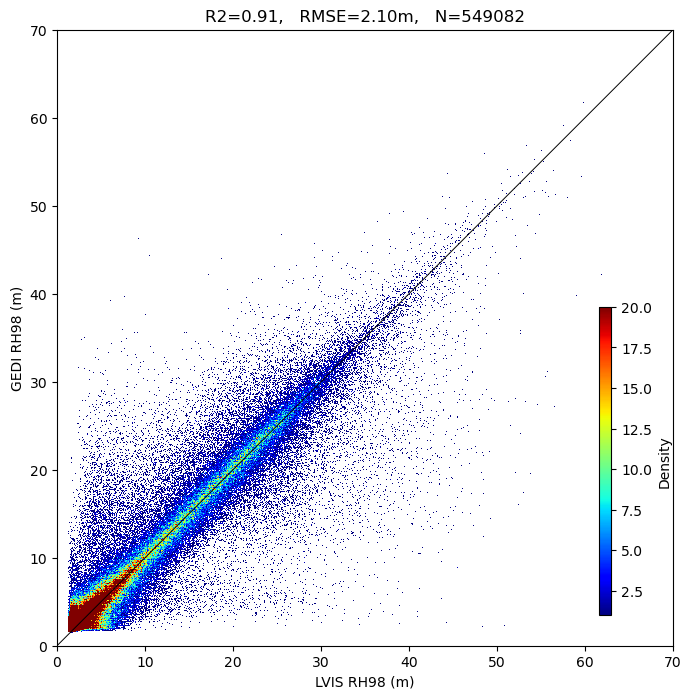

In [294]:
plot_scatter(GEDI_L2A_df_alg, LVIS_df, bins=1000, limit=70, vmax=20)

In [ ]:
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(22, 11))
# for ax, beam_id in zip(axs.ravel(), [ 0,  1,  2,  3,  5,  6,  8, 11]): 
#     mask = GEDI_df_final['beam_x']==beam_id
#     ax.scatter(GEDI_df_final['rx_energy'][mask], rh98_residual[mask], s=5, label='hg') 
#     ax.set_title('beam_id={}'.format(beam_id))
#     ax.set_xlabel('GEDI RX_energy')
#     ax.set_ylabel('RH98 Residual (m)')
# plt.savefig('figs/energy.png', dpi=300, bbox_inches='tight')
# plt.show()

# labeling

total:    549082
tp:       533149 97.09824762057397
fp_grd:  14781 2.691947650806255


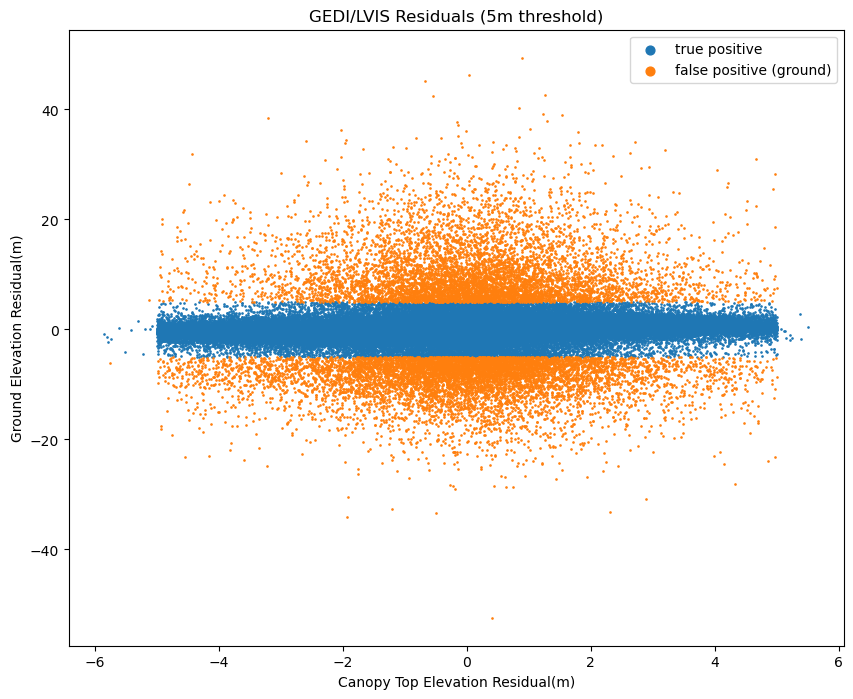

In [295]:
# top_thresh = 1000
grd_thresh = 5

# tp = np.logical_and(np.abs(ctop_residuals)<=top_thresh, np.abs(ground_residuals)<=grd_thresh)
# fp_ctop = np.logical_and(ctop_residuals>top_thresh, np.abs(ground_residuals)<grd_thresh)
# tp = ~fp_ctop
# fp_grd = np.logical_and(ground_residuals<-grd_thresh, np.abs(ctop_residuals)<top_thresh)
# fp = np.logical_and(ground_residuals<-grd_thresh, ctop_residuals>top_thresh)
# fn_all = np.logical_or(ground_residuals>grd_thresh, ctop_residuals<-top_thresh)
# no_label1 = np.logical_and(fn_all, ground_residuals<-grd_thresh)
# no_label2 = np.logical_and(fn_all, ctop_residuals>top_thresh)
# no_label = np.logical_or(no_label1, no_label2)
# fn = np.logical_xor(fn_all, no_label)

bad_data = ctop_residuals<-15
fp_grd = np.logical_and(np.abs(ground_residuals)>grd_thresh, ~bad_data)
tp = np.logical_and(~fp_grd, ~bad_data)


print('total:   ', len(tp))
tp_perc = np.sum(tp)/len(tp)
print('tp:      ', np.sum(tp), tp_perc*100)
print('fp_grd: ', np.sum(fp_grd), (np.sum(fp_grd)/len(tp))*100)
# print('fp_grd:  ', np.sum(fp_grd), (np.sum(fp_grd)/len(tp))*100)
# print('fp:      ', np.sum(fp), (np.sum(fp)/len(tp))*100)
# print('fn:      ', np.sum(fn), (np.sum(fn)/len(tp))*100)
# print('no label:', np.sum(no_label), (np.sum(no_label)/len(tp))*100)
# print('total:   ', np.sum(tp)+np.sum(fp_ctop)+np.sum(fp_grd)+np.sum(fp)+np.sum(fn)+np.sum(no_label))

labels = np.zeros(len(tp))
# labels[fp_ctop] = 1
labels[fp_grd] = 1
labels[bad_data] = 2
# labels[fp] = 3
# labels[fn] = 4
# labels[no_label] = 5

label_names = ['true positive', 
              # 'false positive(canopy top)', 
              'false positive(ground)', 
              # 'false positive(both)', 
              # 'false negative', 
              # 'no label'
              ]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(ctop_residuals[tp], ground_residuals[tp], s=0.8, label='true positive')
scatter = plt.scatter(ctop_residuals[fp_grd], ground_residuals[fp_grd], s=0.8, label='false positive (ground)')
# scatter = plt.scatter(ctop_residuals[bad_data], ground_residuals[bad_data], s=0.8, label='bad data')

# scatter = plt.scatter(ctop_residuals[fp_ctop], ground_residuals[fp_ctop], s=0.8, label='false positive(canopy top)')
# scatter = plt.scatter(ctop_residuals[fp], ground_residuals[fp], s=0.8, label='false positive (both)')
# scatter = plt.scatter(ctop_residuals[fn], ground_residuals[fn], s=0.8, label='false negative')
# scatter = plt.scatter(ctop_residuals[no_label], ground_residuals[no_label], s=0.8, label='no label')
plt.title('GEDI/LVIS Residuals (5m threshold)')
plt.xlabel('Canopy Top Elevation Residual(m)')
plt.ylabel('Ground Elevation Residual(m)')
# plt.xlim(-6, 6)
# plt.ylim(-50, 60)

legend = plt.legend()
for handle in legend.legend_handles:
    handle.set_sizes([40])
# plt.savefig('figs/scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# test/train split

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [296]:
X_data = []
for gedi_wf, sample_count in tqdm(zip(GEDI_L1B_df['rxwaveform'].values, GEDI_L1B_df['rx_sample_count'].values), position=0, total=len(GEDI_L1B_df)):
    gedi_wf = gedi_wf[:sample_count]
    gedi_wf = (gedi_wf - gedi_wf.min())/(gedi_wf.max() - gedi_wf.min())
    temp = np.zeros(1420)
    temp[:sample_count] = gedi_wf
    X_data.append(temp)
X_data = np.array(X_data)
X_data.shape

100%|█████████████████████████████████| 549082/549082 [00:15<00:00, 35103.08it/s]


(549082, 1420)

In [297]:
X2_data = NASA_DEM_df[['relative_pixel_distance', 'elevation', 'slope', 'aspect', 'elevation_mean_3x3', 'slope_mean_3x3']].to_numpy()
X2_data.shape

(549082, 6)

In [298]:
Y_data = labels.copy().astype('int')
data_inds = np.arange(Y_data.shape[0])

X_data = X_data[Y_data!=2]
X2_data = X2_data[Y_data!=2]
data_inds = data_inds[Y_data!=2]
Y_data = Y_data[Y_data!=2]

clss0_inds = np.where(Y_data==0)[0]
np.random.seed(39)
np.random.shuffle(clss0_inds)
num = int((1-tp_perc)*len(Y_data))

data_mask = np.zeros(Y_data.shape[0]).astype('bool')
data_mask[Y_data!=0] = True
data_mask[clss0_inds[:num]] = True

X = X_data[data_mask]
X_extra = X_data[~data_mask]
X2 = X2_data[data_mask]
X2_extra = X2_data[~data_mask]
Y = Y_data[data_mask]
Y_extra = Y_data[~data_mask]

print(X.shape, X_extra.shape)
print(X2.shape, X2_extra.shape)
print(Y.shape, Y_extra.shape)
inds_used = data_inds[data_mask]
inds_extra = data_inds[~data_mask]

uniq, count = np.unique(Y, return_counts=True)
print(uniq, count)
print(count/len(Y))

(30680, 1420) (517250, 1420)
(30680, 6) (517250, 6)
(30680,) (517250,)
[0 1] [15899 14781]
[0.51822034 0.48177966]


In [299]:
x_train, x_test, x2_train, x2_test, y_train, y_test, inds_train, inds_test = train_test_split(X, X2, Y, inds_used, test_size=0.3, random_state=42, stratify=Y)

# y_train_binary = y_train.copy()
# y_train_binary[y_train_binary!=0] = 1

# y_test_binary = y_test.copy()
# y_test_binary[y_test_binary!=0] = 1

print(x_train.shape, x_test.shape)
print(x2_train.shape, x2_test.shape)
print(y_train.shape, y_test.shape)
print(inds_train.shape, inds_test.shape)

(21476, 1420) (9204, 1420)
(21476, 6) (9204, 6)
(21476,) (9204,)
(21476,) (9204,)


gedi sn:  41030800200091310
lvis sn:  15240246
lvis lfid:  1659418227
dist1:  5.301709632468553
dist2:  5.994791823588081


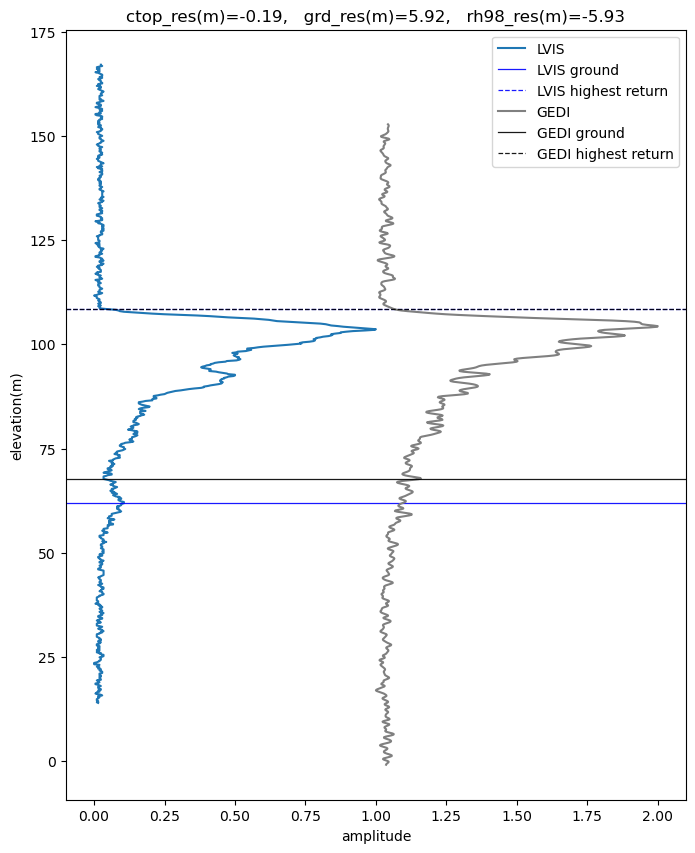

In [300]:
plot_wf(inds_train[1011])

# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf_classifier = RandomForestClassifier(n_estimatrs=100, random_state=42)
rf_classifier = RandomForestClassifier(n_jobs=20)


# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# save model
# with open(f'models/random_forest_ctop_{top_thresh}m.pkl', 'wb') as file:
#     pickle.dump(rf_classifier, file)

# # load model
# with open('models/random_forest_multiclass.pkl', 'rb') as file:
#     rf_classifier = pickle.load(file)
    
# Make predictions on the test data
y_pred_test = rf_classifier.predict(x_test)
y_pred_train = rf_classifier.predict(x_train)
y_pred_extra = rf_classifier.predict(X_extra)

# Display the classification report
print('test')
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print('train')
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print('extra')
print("Classification Report:\n", classification_report(Y_extra, y_pred_extra))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print(cm/len(y_pred_test))

In [ ]:
cm = confusion_matrix(Y_extra, y_pred_extra)
print(cm)
print(cm/len(y_pred_extra))

In [ ]:
wrong_label_mask = y_pred_test!=y_test
wrong_label_inds = inds_test[wrong_label_mask]

wrong_label_rh98_error = LVIS_df['RH98'].values[wrong_label_inds] - GEDI_L2A_df_alg['geolocation/rh_98'].values[wrong_label_inds]/100
wrong_label_ctop_error = LVIS_df['ZT'].values[wrong_label_inds] - GEDI_L2A_df_alg['geolocation/elev_highestreturn'].values[wrong_label_inds]
wrong_label_grnd_error = LVIS_df['ZG'].values[wrong_label_inds] - GEDI_L2A_df_alg['geolocation/elev_lowestmode'].values[wrong_label_inds]

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
axs[0].hist(wrong_label_rh98_error, bins=30, alpha=0.9, histtype="bar", edgecolor="black")
axs[0].set_xlabel('RH98 error (m)')

axs[1].hist(wrong_label_ctop_error, bins=30, alpha=0.9, histtype="bar", edgecolor="black")
axs[1].set_xlabel('elev_highestreturn error (m)')

axs[2].hist(wrong_label_grnd_error, bins=30, alpha=0.9, histtype="bar", edgecolor="black")
axs[2].set_xlabel('elev_lowestmode error (m)')
plt.savefig('aaaa.png', dpi=300)
plt.show()

In [ ]:
# import lime
# from lime import lime_tabular

# explainer = lime_tabular.LimeTabularExplainer(x_train,

#                                               mode="classification",
#                                               feature_names=[f'bin{x}' for x in range(x_train.shape[1])],
#                                               class_names=['good data', 'outlier'],
#                                               discretize_continuous=True)

# instance = x_test[wrong_label_mask][200]
# plt.figure()
# plt.plot(instance)
# plt.show()
# exp = explainer.explain_instance(instance, rf_classifier.predict_proba, num_features=len(instance))
# exp.show_in_notebook(show_table=True)

In [ ]:
x_test.shape

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_classifier)
# shap_values = explainer.shap_values(x_test[~wrong_label_mask][:500], check_additivity=False)
shap_values = explainer.shap_values(x_test, check_additivity=False)
shap_values.shape

In [ ]:
shap.summary_plot(shap_values[:, :, 0], x_test[~wrong_label_mask][:500], feature_names=[f'bin{x}' for x in range(x_train.shape[1])])

In [ ]:
plot_wf(ind)

In [ ]:
ind = 94
inds = np.argsort(np.abs(shap_values[ind, :, 0]))[-20:]
plt.figure(figsize=(9, 7))
plt.plot(x_test[~wrong_label_mask][:500][ind])
plt.plot(inds, x_test[~wrong_label_mask][:500][ind][inds], 'ro', markersize=4)
plt.show()


In [ ]:
shap.summary_plot(shap_values[ind:ind+1, :, 0], x_test[wrong_label_mask][ind:ind+1], feature_names=[f'bin{x}' for x in range(x_train.shape[1])])
shap.decision_plot(explainer.expected_value[0], shap_values[:, :, 0], x_test)

In [ ]:
shap_values[0, :, 0].shape

In [ ]:
np.argsort(np.abs(shap_values[0, :, 0])).shape

In [ ]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(n_jobs=20)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train_binary)

# save model
with open('models/random_forest_binary.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

# load model
with open('models/random_forest_binary.pkl', 'rb') as file:
    rf_classifier = pickle.load(file)
    
# Make predictions on the test data
y_pred_test_binary = rf_classifier.predict(x_test)
y_pred_train_binary = rf_classifier.predict(x_train)
y_pred_extra_binary = rf_classifier.predict(X_extra)

# Display the classification report
print('test')
print("Classification Report:\n", classification_report(y_test_binary, y_pred_test_binary))
print('train')
print("Classification Report:\n", classification_report(y_train_binary, y_pred_train_binary))
print('extra')
print("Classification Report:\n", classification_report(Y_extra, y_pred_extra_binary))

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 18))
# plot_inds = np.random.randint(0, len(x_test), 6)
plot_inds = np.random.choice(np.where(y_pred_test!=0)[0], size=6, replace=False)

alpha_value = 0.8
for i, ax in zip(plot_inds, axs.ravel()):
    df_ind = inds_test[i]
    lvis_wf = LVIS_df_final['RXWAVE'][df_ind]
    lvis_zstretch = LVIS_df_final['zstretch'][df_ind]
    
    gedi_wf = GEDI_df_final['rxwaveform'][df_ind]
    gedi_zstretch = GEDI_df_final['zstretch'][df_ind]
    
    ax.set_ylabel('elevation(m)')
    ax.set_xlabel('amplitude')
    
    ax.plot((lvis_wf-np.min(lvis_wf))/(np.max(lvis_wf)-np.min(lvis_wf)), lvis_zstretch, label='LVIS')
    ax.axhline(y = LVIS_df_final['ZG'][df_ind], color = 'b', label='LVIS ground', linewidth=0.9, alpha=alpha_value)
    ax.axhline(y = LVIS_df_final['ZT'][df_ind], color = 'b', linestyle='--', label='LVIS highest return', linewidth=0.9, alpha=alpha_value)
    
    ax.plot(1+(gedi_wf-np.min(gedi_wf))/(np.max(gedi_wf)-np.min(gedi_wf)), gedi_zstretch, 'grey', label='GEDI')
    ax.axhline(y = GEDI_df_final['elev_lowestmode'][df_ind], color = 'k', label='GEDI ground', linewidth=0.9, alpha=alpha_value)
    ax.axhline(y = GEDI_df_final['elev_highestreturn'][df_ind], color = 'k', linestyle='--', label='GEDI highest return', linewidth=0.9, alpha=alpha_value)
    ax.legend()
    ax.set_title(f'label: {y_test[i]}, pred (multi class): {y_pred_test[i]}, pred (binary): {y_pred_test_binary[i]}')
plt.show()


# cnn

In [301]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import multiprocessing

def create_model(lidar_bins=1420, num_ancillary_features=1, use_ancillary=False):
    # Input layers
    lidar_input = Input(shape=(lidar_bins,), name='lidar_input')
    
    # LiDAR branch
    x = layers.Reshape((lidar_bins, 1))(lidar_input)
    x = layers.Conv1D(64, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    lidar_features = layers.Dense(64, activation='relu', name='lidar_features')(x)
    
    if use_ancillary:
        # Ancillary data branch
        ancillary_input = Input(shape=(num_ancillary_features,), name='ancillary_input')
        y = layers.Dense(32, activation='relu')(ancillary_input)
        y = layers.Dense(32, activation='relu')(y)
        ancillary_features = layers.Dense(16, activation='relu', name='ancillary_features')(y)
        
        # Combine features
        combined = layers.concatenate([lidar_features, ancillary_features])
    else:
        combined = lidar_features
    
    # Joint layers
    z = layers.Dense(64, activation='relu')(combined)
    z = layers.Dense(32, activation='relu')(z)
    z = layers.Dropout(0.3)(z)  # Add dropout for regularization
    
    # Output layer: Changed to a single neuron with sigmoid activation
    output = layers.Dense(1, activation='sigmoid', name='output')(z)
    
    # Create model
    if use_ancillary:
        model = Model(inputs=[lidar_input, ancillary_input], outputs=output)
    else:
        model = Model(inputs=lidar_input, outputs=output)
    
    return model

In [302]:
model = create_model(lidar_bins=1420, num_ancillary_features=6, use_ancillary=False)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lidar_input (InputLayer)    [(None, 1420)]            0         
                                                                 
 reshape_9 (Reshape)         (None, 1420, 1)           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 1418, 64)          256       
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 709, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 707, 128)          24704     
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 353, 128)          0         
 ng1D)                                                     

In [253]:
# NUM_CORES = multiprocessing.cpu_count()
# print(NUM_CORES)

# tf.config.threading.set_intra_op_parallelism_threads(NUM_CORES)

In [303]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1             # Output verbosity
)

model_checkpoint = ModelCheckpoint(
    'models/best_model_a_2.h5',      # File path to save the best model
    monitor='val_loss',   # Monitor the validation loss
    save_best_only=True,  # Save only the best model based on the monitored quantity
    verbose=1             # Output verbosity
)

# Fit the model
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    validation_data=(x_test, y_test),
    use_multiprocessing=True,
    workers=20,
    shuffle=True,
    callbacks=[early_stopping, model_checkpoint]  # Add callbacks here
)

Epoch 1/30
671/672 [============================>.] - ETA: 0s - loss: 0.2903 - accuracy: 0.8986
Epoch 1: val_loss improved from inf to 0.25868, saving model to models/best_model_a_2.h5
672/672 [==============================] - 20s 27ms/step - loss: 0.2904 - accuracy: 0.8985 - val_loss: 0.2587 - val_accuracy: 0.9086
Epoch 2/30
  3/672 [..............................] - ETA: 18s - loss: 0.2491 - accuracy: 0.9375

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


670/672 [============================>.] - ETA: 0s - loss: 0.2529 - accuracy: 0.9128
Epoch 2: val_loss improved from 0.25868 to 0.23800, saving model to models/best_model_a_2.h5
672/672 [==============================] - 18s 27ms/step - loss: 0.2526 - accuracy: 0.9129 - val_loss: 0.2380 - val_accuracy: 0.9150
Epoch 3/30
670/672 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.9203
Epoch 3: val_loss improved from 0.23800 to 0.23752, saving model to models/best_model_a_2.h5
672/672 [==============================] - 22s 32ms/step - loss: 0.2348 - accuracy: 0.9203 - val_loss: 0.2375 - val_accuracy: 0.9164
Epoch 4/30
670/672 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9237
Epoch 4: val_loss improved from 0.23752 to 0.22120, saving model to models/best_model_a_2.h5
672/672 [==============================] - 18s 27ms/step - loss: 0.2212 - accuracy: 0.9236 - val_loss: 0.2212 - val_accuracy: 0.9219
Epoch 5/30
672/672 [=========================

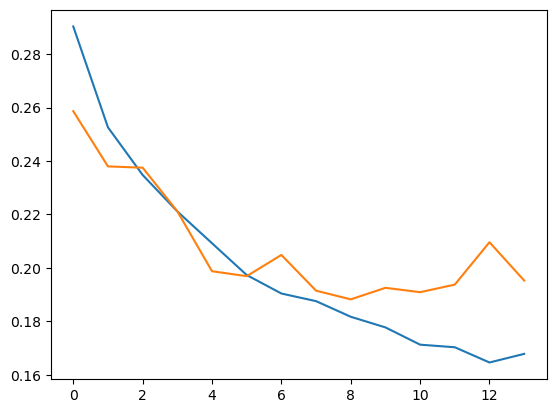

In [304]:
# history.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_loss'])

In [305]:
from tensorflow.keras.models import load_model
best_model = load_model('models/best_model_a_2.h5')

y_pred_test = best_model.predict(x_test)>0.5
print('test')
print("Classification Report:\n", classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print(cm/len(y_pred_test))
print('\n')

y_pred_train = best_model.predict(x_train)>0.5
print('train')
print("Classification Report:\n", classification_report(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print(cm/len(y_pred_train))
print('\n')

y_pred_extra = best_model.predict(X_extra, use_multiprocessing=True, workers=20)>0.5
print('extra')
print("Classification Report:\n", classification_report(Y_extra, y_pred_extra))
cm = confusion_matrix(Y_extra, y_pred_extra)
print(cm)
print(cm/len(y_pred_extra))

288/288 [==============================] - 1s 4ms/step
test
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      4770
           1       0.90      0.97      0.93      4434

    accuracy                           0.93      9204
   macro avg       0.93      0.93      0.93      9204
weighted avg       0.93      0.93      0.93      9204

[[4286  484]
 [ 145 4289]]
[[0.4656671  0.05258583]
 [0.01575402 0.46599305]]


672/672 [==============================] - 3s 4ms/step
train
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     11129
           1       0.91      0.98      0.94     10347

    accuracy                           0.94     21476
   macro avg       0.94      0.94      0.94     21476
weighted avg       0.94      0.94      0.94     21476

[[10109  1020]
 [  244 10103]]
[[0.47071149 0.04749488]
 [0.01136152 0.47043211]]


16165/16165 [

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.94    517250
           1       0.00      0.00      0.00         0

    accuracy                           0.90    517250
   macro avg       0.50      0.45      0.47    517250
weighted avg       1.00      0.90      0.94    517250

[[463081  54169]
 [     0      0]]
[[0.89527501 0.10472499]
 [0.         0.        ]]


/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
import shap
explainer = shap.GradientExplainer(best_model, x_test)
shap_values = explainer.shap_values(x_test)
shap_values.shape

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


(9204, 1420, 1)

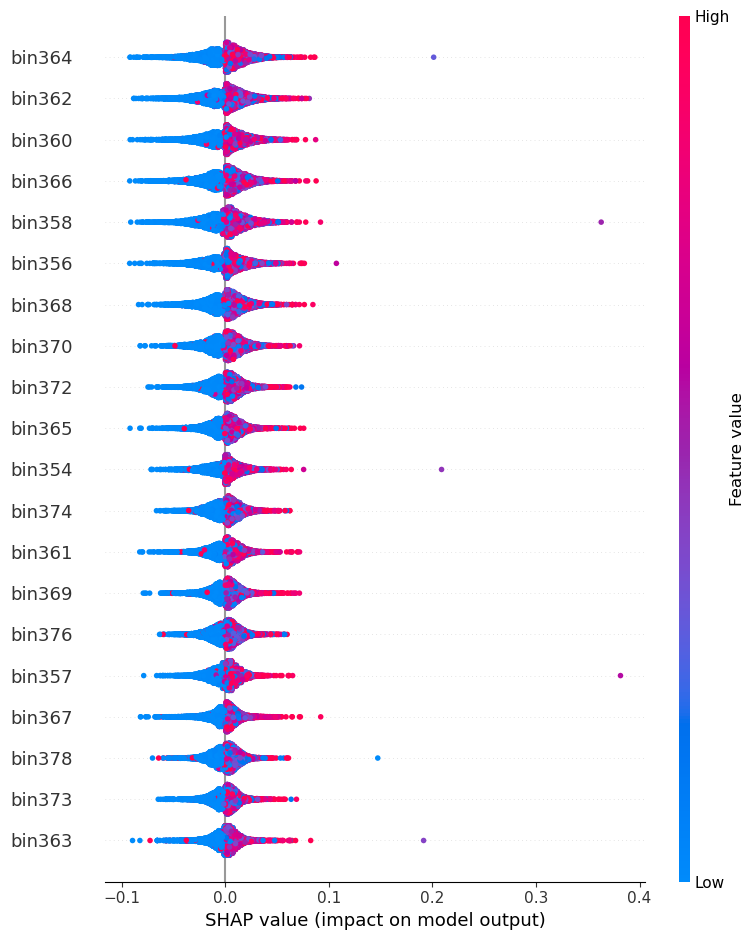

In [307]:
shap.summary_plot(shap_values[:, :, 0], x_test, feature_names=[f'bin{x}' for x in range(x_train.shape[1])])

labe:  1
prediction:  [ True]
gedi sn:  145110300300199434
lvis sn:  20024774
lvis lfid:  1659432298
dist1:  5.979036991713265
dist2:  8.294133587209563


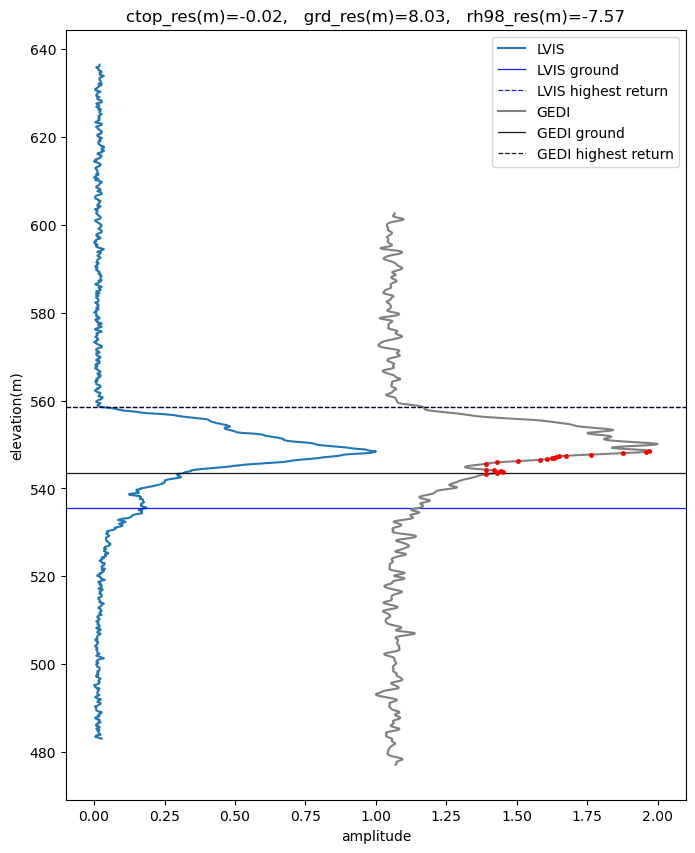

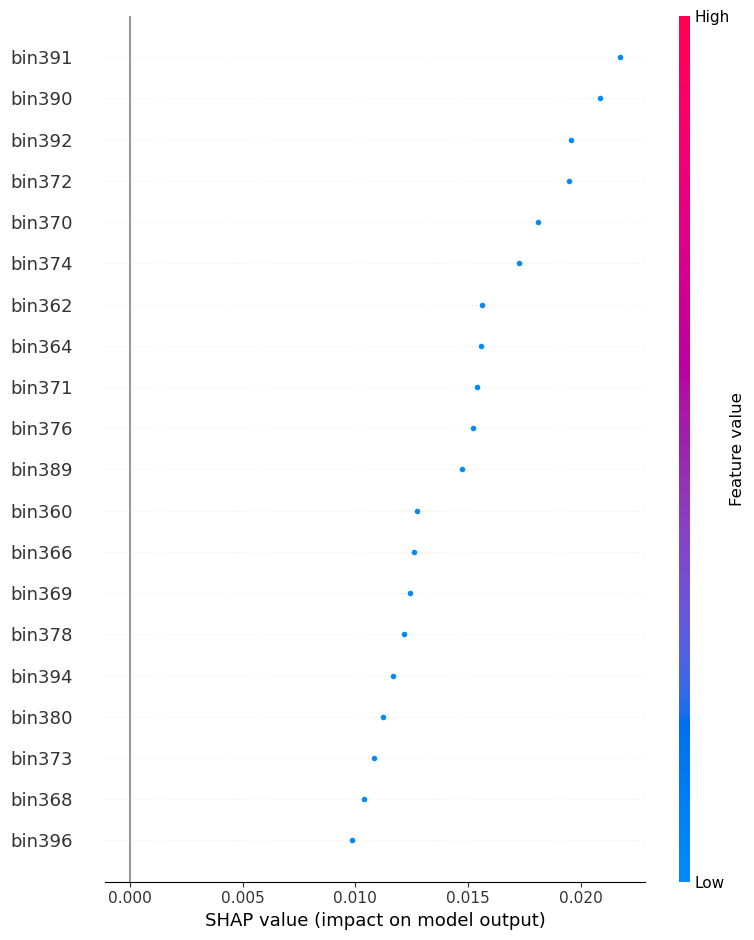

In [325]:
# 120, 113
ind = 1123
print('labe: ', y_test[ind])
print('prediction: ', y_pred_test[ind])
shap_inds = np.argsort(np.abs(shap_values[ind, :, 0]))[-20:]
plot_wf(inds_test[ind], shap_inds)
shap.summary_plot(shap_values[ind:ind+1, :, 0], x_test[ind:ind+1], feature_names=[f'bin{x}' for x in range(x_train.shape[1])])

# multimodal cnn

In [309]:
model_anc = create_model(lidar_bins=1420, num_ancillary_features=6, use_ancillary=True)

model_anc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_anc.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 lidar_input (InputLayer)    [(None, 1420)]               0         []                            
                                                                                                  
 reshape_10 (Reshape)        (None, 1420, 1)              0         ['lidar_input[0][0]']         
                                                                                                  
 conv1d_20 (Conv1D)          (None, 1418, 64)             256       ['reshape_10[0][0]']          
                                                                                                  
 max_pooling1d_20 (MaxPooli  (None, 709, 64)              0         ['conv1d_20[0][0]']           
 ng1D)                                                                                     

In [310]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    verbose=1             # Output verbosity
)

model_checkpoint = ModelCheckpoint(
    'models/best_model_anc_a_2.h5',      # File path to save the best model
    monitor='val_loss',   # Monitor the validation loss
    save_best_only=True,  # Save only the best model based on the monitored quantity
    verbose=1             # Output verbosity
)

# Fit the model
history = model_anc.fit(
    [x_train, x2_train],
    y_train,
    epochs=30,
    validation_data=([x_test, x2_test], y_test),
    use_multiprocessing=True,
    workers=20,
    shuffle=True,
    callbacks=[early_stopping, model_checkpoint]  # Add callbacks here
)

Epoch 1/30
670/672 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8847
Epoch 1: val_loss improved from inf to 0.27026, saving model to models/best_model_anc_a_2.h5
672/672 [==============================] - 20s 27ms/step - loss: 0.3518 - accuracy: 0.8848 - val_loss: 0.2703 - val_accuracy: 0.9027
Epoch 2/30
  1/672 [..............................] - ETA: 18s - loss: 0.2284 - accuracy: 0.9375

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


670/672 [============================>.] - ETA: 0s - loss: 0.2650 - accuracy: 0.9074
Epoch 2: val_loss improved from 0.27026 to 0.23570, saving model to models/best_model_anc_a_2.h5
672/672 [==============================] - 92s 137ms/step - loss: 0.2651 - accuracy: 0.9073 - val_loss: 0.2357 - val_accuracy: 0.9140
Epoch 3/30
670/672 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9157
Epoch 3: val_loss improved from 0.23570 to 0.21621, saving model to models/best_model_anc_a_2.h5
672/672 [==============================] - 89s 132ms/step - loss: 0.2417 - accuracy: 0.9157 - val_loss: 0.2162 - val_accuracy: 0.9222
Epoch 4/30
672/672 [==============================] - ETA: 0s - loss: 0.2304 - accuracy: 0.9215
Epoch 4: val_loss did not improve from 0.21621
672/672 [==============================] - 18s 27ms/step - loss: 0.2304 - accuracy: 0.9215 - val_loss: 0.2256 - val_accuracy: 0.9203
Epoch 5/30
671/672 [============================>.] - ETA: 0s - loss: 0.2170 - ac

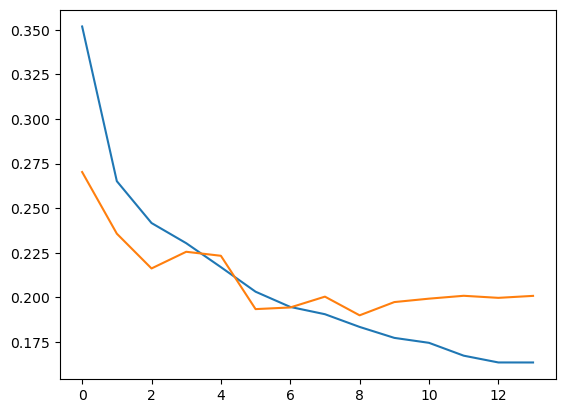

In [311]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_loss'])

In [312]:
from tensorflow.keras.models import load_model
best_anc_model = load_model('models/best_model_anc_a_2.h5')

y_pred_test = best_anc_model.predict([x_test, x2_test])>0.5
print('test')
print("Classification Report:\n", classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print(cm/len(y_pred_test))
print('\n')

y_pred_train = best_anc_model.predict([x_train, x2_train])>0.5
print('train')
print("Classification Report:\n", classification_report(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print(cm/len(y_pred_train))
print('\n')

y_pred_extra = best_anc_model.predict([X_extra, X2_extra], use_multiprocessing=True, workers=20)>0.5
print('extra')
print("Classification Report:\n", classification_report(Y_extra, y_pred_extra))
cm = confusion_matrix(Y_extra, y_pred_extra)
print(cm)
print(cm/len(y_pred_extra))

288/288 [==============================] - 1s 4ms/step
test
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      4770
           1       0.91      0.96      0.93      4434

    accuracy                           0.93      9204
   macro avg       0.94      0.94      0.93      9204
weighted avg       0.94      0.93      0.93      9204

[[4334  436]
 [ 163 4271]]
[[0.47088223 0.04737071]
 [0.01770969 0.46403738]]


672/672 [==============================] - 3s 4ms/step
train
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     11129
           1       0.91      0.97      0.94     10347

    accuracy                           0.94     21476
   macro avg       0.94      0.94      0.94     21476
weighted avg       0.94      0.94      0.94     21476

[[10164   965]
 [  302 10045]]
[[0.47327249 0.04493388]
 [0.01406221 0.46773142]]


16165/16165 [

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    517250
           1       0.00      0.00      0.00         0

    accuracy                           0.90    517250
   macro avg       0.50      0.45      0.47    517250
weighted avg       1.00      0.90      0.95    517250

[[466565  50685]
 [     0      0]]
[[0.90201063 0.09798937]
 [0.         0.        ]]


/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [313]:
import shap
explainer_anc = shap.GradientExplainer(best_anc_model, [x_test, x2_test])
shap_values_anc = explainer_anc.shap_values([x_test, x2_test])

/gpfs/data1/vclgp/aghdamim/envs/env4/lib/python3.9/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


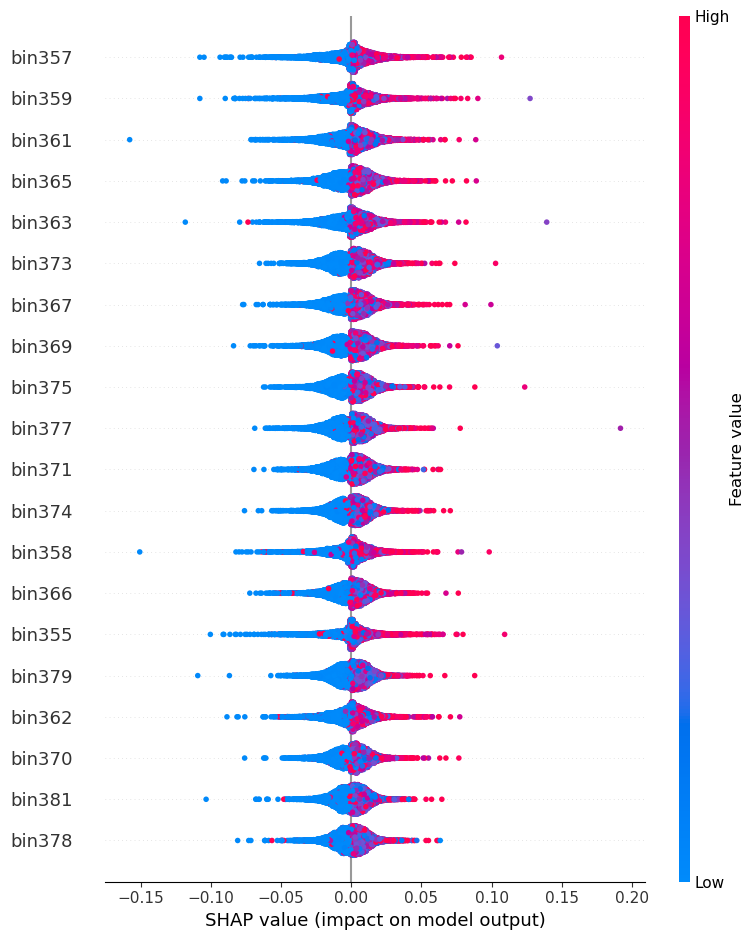

In [314]:
shap.summary_plot(shap_values_anc[0][:, :, 0], x_test, feature_names=[f'bin{x}' for x in range(x_train.shape[1])])

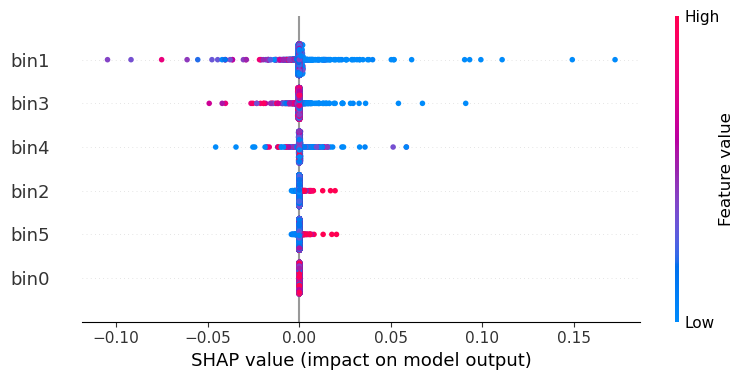

In [266]:
shap.summary_plot(shap_values_anc[1][:, :, 0], x2_test, feature_names=[f'bin{x}' for x in range(6)])

shap feature:  elevation_mean_3x3
labe:  1
prediction:  [ True]
gedi sn:  145110300300199434
lvis sn:  20024774
lvis lfid:  1659432298
dist1:  5.979036991713265
dist2:  8.294133587209563


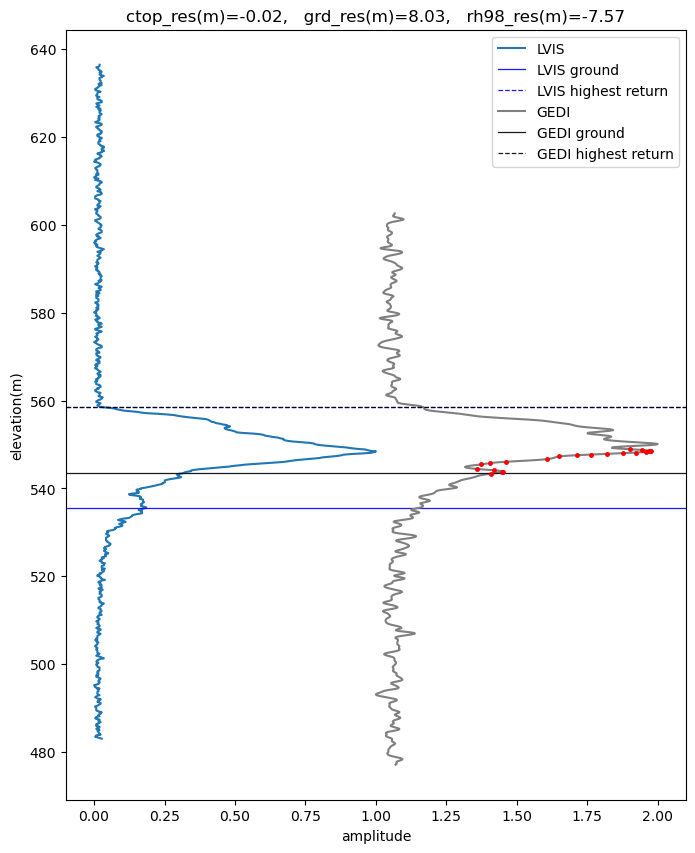

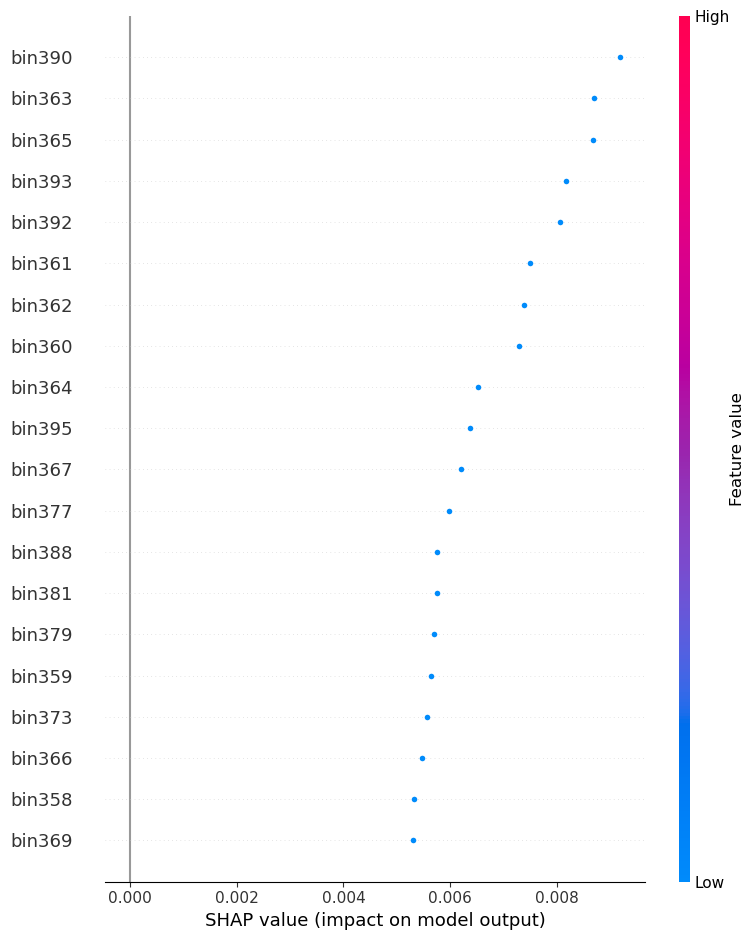

In [324]:
# 120 666
ind = 1123
shap_features = ['relative_pixel_distance', 'elevation', 'slope', 'aspect', 'elevation_mean_3x3', 'slope_mean_3x3']
print('shap feature: ', shap_features[np.argsort(np.abs(shap_values_anc[1][ind, :, 0]))[-1]])
print('labe: ', y_test[ind])
print('prediction: ', y_pred_test[ind])
shap_inds = np.argsort(np.abs(shap_values_anc[0][ind, :, 0]))[-20:]
plot_wf(inds_test[ind], shap_inds)
shap.summary_plot(shap_values_anc[0][ind:ind+1, :, 0], x_test[ind:ind+1], feature_names=[f'bin{x}' for x in range(x_train.shape[1])])